<a href="https://colab.research.google.com/github/Eltralo/HW_3-Rock-Paper-Scissors-game-/blob/main/HW_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rock Paper Scissors game ##

Для закрепления пройденного материала предлагаем вам следующее задание: используя библиотеку kaggle-environments, которая реализует функционал взаимодействия между виртуальными агентами в рамках нескольких популярных игр, реализовать самостоятельно несколько агентов и сравнить их в игре «камень-ножницы-бумага».** **Текст, выделенный полужирным шрифтом



#0 - **rock**
#1 - **paper**
#2 - **scissors**

In [164]:
!pip install -q -U kaggle_environments

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ERROR: unknown command "unstall" - maybe you meant "uninstall"


## Импортирование необходимых библиотек ##

In [166]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

In [158]:
random.seed(45)

##1. Агент, который всегда играет ножницы ##

In [100]:
%%writefile rock_agent.py

def your_agent(observation, configuration): # функция всегда возращающая камень
    return 0

Overwriting rock_agent.py


##2. Агент, который всегда играет бумагу ##


In [101]:
%%writefile paper_agent.py

def your_agent(observation, configuration): ## функция, которая всегда возвращает бумагу
    return 1

Overwriting paper_agent.py


## 3.Агент, который всегда играет ножницы ##

---



In [102]:
%%writefile scissors.py

def your_agent(observation, configuration): ## фуекция, которая всегда возвращает ножницы
    return 2

Overwriting scissors.py


## 4. Агент, повторяющий прошлое действие оппонента, а в противном случае кидает ножницы ##

In [159]:

%%writefile copy_opponent.py
import random

def copy_opponent(observation, configuration):

    if observation.get('step') > 0:   # если шаг не самый первый
        return observation.get('lastOpponentAction',0) # доставть из словаря последнее действие оппонента
    else:
        return 1


Overwriting copy_opponent.py


## 5. Агент, который всегда выбрасывает рандом ##

In [105]:
%%writefile random_goblin.py


import random

def random_goblin(observation, configuration):
    return random.randint(0, 2)                    # возвращает рандом от 0 до 2

Overwriting random_goblin.py


## 6. Агент, который считает шаги ##

In [167]:
%%writefile counter_reactionary.py

import random
last_counter_action = 0

#Функция для определения, выигрывает ли action1 над action2

def get_score(action1, action2):

    return (action1 - action2) % 3 == 1   # если
# Функция агента, которая выбирает действия на основе предыдущих действий противника.

def counter_reactionary(observation, configuration):
    global last_counter_action
    # На первом шаге выбираем случайное действие
    if observation.step == 0:
        last_counter_action = random.randrange(0, configuration.signs)
         # Если последнее наше действие выиграло, выбираем действие, которое проигрывает текущему
    elif get_score(last_counter_action, observation.lastOpponentAction) == 1:
        last_counter_action = (last_counter_action + 2) % configuration.signs
    # Иначе выбираем действие, которое побеждает последнее действие соперника
    else:
        last_counter_action = (observation.lastOpponentAction + 1) % configuration.signs

    return last_counter_action

action_histogram = {}

Overwriting counter_reactionary.py


## 7. Агент, определяющий статистику##

In [107]:
%%writefile agent7.py
import random
def statistical(observation, configuration):
  ## Объявляем глобальную переменную для хранения гистограммы действий
    global action_histogram
    if observation.step == 0:
      # На первом шаге инициализируем гистограмму действий
        action_histogram = {}
        return
    action = observation.lastOpponentAction # Получаем последнее действие противника

    #Если действие противника отсутствует в гистограмме, добавляем его
    if action not in action_histogram:
        action_histogram[action] = 0
    action_histogram[action] += 1
    mode_action = None    #Переменная для хранения наиболее частого действия
    mode_action_count = None  # Переменная для хранения частоты этого действия


# Итерируем по всем записям гистограммы для поиска наиболее частого действия
    for k, v in action_histogram.items():
        if mode_action_count is None or v > mode_action_count:
            mode_action = k
            mode_action_count = v
            continue

    return (mode_action + 1) % configuration.signs


Overwriting agent7.py


## 8. Агент, который чередует действия (0-1-2-0)##

In [108]:
%%writefile agent8.py
import random
## Функция возвращает число, на 2 большее номера текущего шага, взятого по модулю 3.
def alternation(observation, configuration):
    return (observation['step'] + 2) % 3


Overwriting agent8.py


## 9. Агент, который пердпочитает бросать только ножницы и только во второй ход, иначе бросает камень.

In [168]:
%%writefile agent9.py
import random
def alternation(observation, configuration):
    if observation.step == 2:         # Если шаг равен 2, вернуть 1
        return 1
    else:
        return 0                     # Иначе ноль

Overwriting agent9.py


## 10. Агент, который бросает только камень во второй ход иначе выбирает рандом ##

In [171]:
%%writefile agent10.py
import random
def alternation(observation, configuration):
  if observation.step == 2:        # Если шаг равен 2, вернуть 1
     return 0
  else:
    return random.randint(0, 2)    # Иначе рандомное значение


Overwriting agent10.py


## 11. Агент, который бросает только бумагу во второй ход, иначе выбирает камень ##

In [172]:
%%writefile agent11.py
import random
def alternation(observation, configuration):
  if observation.step == 2:     #Если шаг равен 2, вернуть 1
     return 2
  else:
    return 0


Overwriting agent11.py


## 12. Агент, который бросает только ножницы и только в третий ход, в остальных случаях выбирает рандом.

In [112]:

%%writefile agent12.py

import random
def alternation(observation, configuration):
    if observation.step == 3:      #Если шаг равен 3, вернуть бумагу
     return 2
        return 1
    else:
        return random.randint(0, 2)

Overwriting agent12.py


## 13. Агент, который бросает только камень и только в третий ход, в остальных случаях рандом, но между камнем и ножницами.##

In [173]:

%%writefile agent13.py

import random
def alternation(observation, configuration):      #Если шаг равен 3, вернуть ножницы
    if observation.step == 3:
        return 1
    else:
       return random.randint(0, 1)

Overwriting agent13.py


## Запуск соревнований ##

Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим наших агентов и проведем эксперимент на заданном количестве игр

Running match between paper_agent.py and rock_agent.py
Result: 2
Running match between paper_agent.py and scissors.py
Result: 1
Running match between paper_agent.py and copy_opponent.py
Result: 1
Running match between paper_agent.py and agent13.py
Result: 1
Running match between paper_agent.py and agent12.py
Result: 2
Running match between paper_agent.py and agent11.py
Result: 1
Running match between paper_agent.py and agent10.py
Result: 1
Running match between paper_agent.py and agent9.py
Result: 2
Running match between paper_agent.py and agent7.py
Result: 1
Running match between paper_agent.py and agent8.py
Result: 2
Running match between paper_agent.py and random_goblin.py
Result: 1
Running match between paper_agent.py and counter_reactionary.py
Result: 1
Running match between rock_agent.py and scissors.py
Result: 2
Running match between rock_agent.py and copy_opponent.py
Result: 1
Running match between rock_agent.py and agent13.py
Result: 2
Running match between rock_agent.py and a

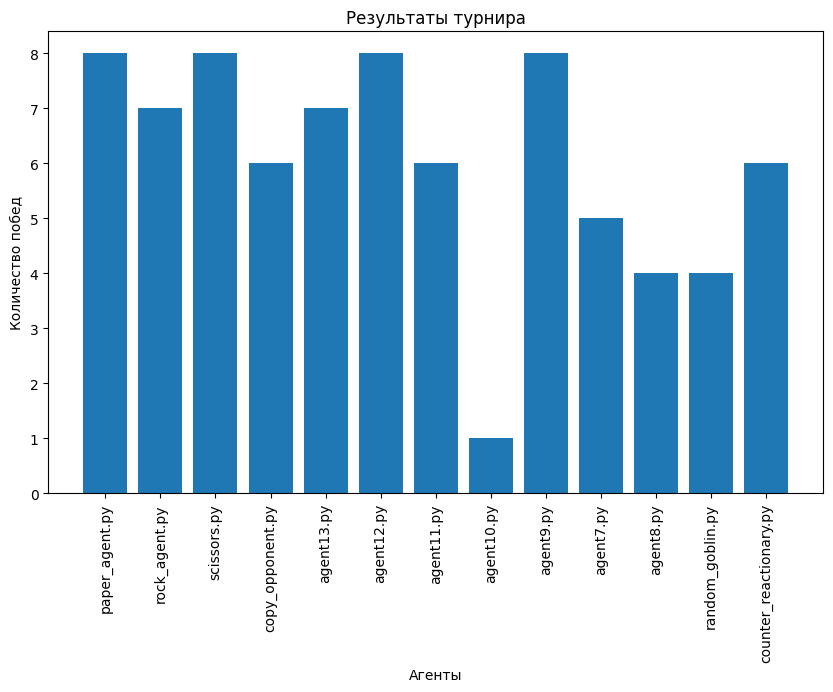

In [179]:
import itertools
import matplotlib.pyplot as plt

# Список ваших агентов
agents = ['paper_agent.py',
    "rock_agent.py", 'scissors.py',
    "copy_opponent.py", 'agent13.py','agent12.py','agent11.py','agent10.py','agent9.py','agent7.py', 'agent8.py','random_goblin.py','counter_reactionary.py']

# Функция для запуска турнира
def run_tournament(agents):
    results = {}

    # Генерация всех уникальных пар агентов
    for agent1, agent2 in itertools.combinations(agents, 2):
        print(f"Running match between {agent1} and {agent2}")
        # Имитация evaluate для демонстрации
        result = evaluate(agent1, agent2)
        print(f"Result: {result}")

        # Сохранение результатов
        results[(agent1, agent2)] = result

    return results

# Имитация функции evaluate (замените на реальную реализацию)
def evaluate(agent1, agent2):
    # Например: 1 - победа первого агента, 2 - победа второго
    # Возьмем случайное решение для примера
    import random
    return random.choice([1, 2])

# Запуск турнира
tournament_results = run_tournament(agents)

# Вывод результатов турнира
for pair, result in tournament_results.items():
    print(f"Result for {pair}: {result}")

# Функция для определения победителя
def determine_winner(tournament_results):
    scores = {agent: 0 for agent in agents}

    for (agent1, agent2), result in tournament_results.items():
        if result == 1:  # agent1 выиграл
            scores[agent1] += 1
        elif result == 2:  # agent2 выиграл
            scores[agent2] += 1

    return scores

# Определение победителей
winners = determine_winner(tournament_results)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.bar(winners.keys(), winners.values())
plt.xticks(rotation=90)
plt.xlabel('Агенты')
plt.ylabel('Количество побед')
plt.title('Результаты турнира')
plt.show()